<a href="https://colab.research.google.com/github/gbam-ds/FP-ML/blob/main/Porto_Seguro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Porto Seguro
##Getting data

see <a href="{https://www.kaggle.com/c/porto-seguro-safe-driver-prediction/discussion/40222}">this discusion</a> about the data: 

In [1]:
# Core
import seaborn as sns
#import pandas as pd
import numpy as np

# Visual
import matplotlib.pyplot as plt
import graphviz
import pprint
import pandas as pd

# Sklearn
from sklearn import tree as sk_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import median_absolute_error, mean_absolute_error, r2_score, max_error, explained_variance_score
from sklearn.model_selection import train_test_split

In [2]:
#import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
pd.set_option('display.max_columns', None)

#train dataset
train_path = '/content/drive/MyDrive/porto-seguro-safe-driver-prediction/train.csv'
train_df = pd.read_csv(train_path)
df = train_df.copy()
df.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [ ]:
df.columns[2]

'ps_ind_01'

In [5]:
#dividindo train.csv em train e test
#nesse código dropamos id

labels = df.columns[2:]

X = df[labels]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)

In [6]:
#definindo train e test

train = pd.concat((y_train, X_train), axis = 1)
test = pd.concat((y_test, X_test), axis = 1) #so vamos usar no final

In [ ]:
df.shape

(595212, 59)

In [ ]:
train.shape

(505930, 58)

In [ ]:
test.shape

(89282, 58)

Perfeito. Agora temos que dividir a base train em treino e validação

In [ ]:
train.head()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
311607,0,6,1,5,0,0,0,0,0,1,0,0,0,0,0,8,1,0,0,0.7,0.3,0.653835,11,1,1,0,0,0,1,1,2,1,95,2,0.400000,0.762201,0.334813,3.000000,0.9,0.9,0.6,4,2,8,4,9,2,11,6,2,2,5,0,0,1,0,0,0
366647,0,0,4,9,1,0,0,0,1,0,0,0,0,0,0,8,1,0,0,0.3,0.0,0.792543,7,1,0,0,1,11,1,1,2,1,44,3,0.447214,0.774717,0.339116,3.162278,0.7,0.4,0.1,1,3,4,2,11,1,5,7,3,0,5,0,1,1,0,0,0
471590,0,0,2,2,0,0,1,0,0,0,0,0,0,0,0,11,1,0,0,0.4,0.0,0.923648,11,0,-1,0,-1,10,1,1,2,1,83,2,0.424264,0.949413,0.418569,3.000000,0.5,0.3,0.5,2,2,8,2,10,3,8,3,3,5,5,0,1,1,0,1,0
538416,0,1,1,10,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.9,1.8,1.825685,11,1,1,6,1,14,1,1,2,1,104,0,0.479583,0.832017,0.386005,3.000000,0.5,0.5,0.9,2,0,9,3,10,2,8,2,1,3,7,0,1,1,1,0,1
459085,1,3,1,5,1,4,0,1,0,0,0,0,0,0,0,0,0,0,1,0.9,0.6,1.033501,11,1,-1,0,-1,7,1,1,2,1,96,3,0.446878,0.724640,0.430116,2.645751,0.3,0.0,0.8,3,4,7,5,9,3,8,3,1,1,13,0,0,1,0,0,0


In [ ]:
train.columns[0]

'target'

In [7]:
#dividindo train
labels = train.columns[1:]

X = train[labels]
y = train['target']

X_treino, X_valid, y_treino, y_valid = train_test_split(X, y, test_size=0.17, random_state=1)

In [8]:
treino = pd.concat((y_treino, X_treino), axis = 1)
valid = pd.concat((y_valid, X_valid), axis = 1)

In [ ]:
treino.shape

(419921, 58)

In [ ]:
valid.shape

(86009, 58)

Perfeito. Agora temos que resamplar treino

In [9]:
from collections import Counter
from imblearn.over_sampling import SMOTE

labels = treino.columns[1:]

X = treino[labels]
y = treino['target']

X_resampled, y_resampled = SMOTE(random_state=7).fit_resample(X,y)
Counter(y_resampled)

Counter({0: 404674, 1: 404674})

In [10]:
X_resampled.reset_index(drop=True, inplace=True)
y_resampled.reset_index(drop=True, inplace=True)

In [11]:
treino = pd.concat((y_resampled, X_resampled), axis = 1)

Agora temos:

*   (1) treino
*   (2) validação (valid)
*   (3) test

Fizemos resample somente para a (1) treino. 

É hora de fazer feature engineering em todas.

In [12]:
#Optamos por substituir -1 para NaN 
treino = treino.replace(-1,{})
valid = valid.replace(-1,{})
test = test.replace(-1,{})

In [13]:
#Na em treino
treino['ps_car_01_cat'].fillna((treino['ps_car_01_cat'].mode()), inplace=True)
treino['ps_car_02_cat'].fillna((treino['ps_car_02_cat'].mode()), inplace=True)
treino['ps_car_04_cat'].fillna((treino['ps_car_04_cat'].mode()), inplace=True)
treino['ps_car_06_cat'].fillna((treino['ps_car_06_cat'].mode()), inplace=True)
treino['ps_car_08_cat'].fillna((treino['ps_car_08_cat'].mode()), inplace=True)
treino['ps_car_09_cat'].fillna((treino['ps_car_09_cat'].mode()), inplace=True)
treino['ps_car_10_cat'].fillna((treino['ps_car_10_cat'].mode()), inplace=True)
treino['ps_car_11_cat'].fillna((treino['ps_car_11_cat'].mode()), inplace=True)

treino['ps_ind_02_cat'].fillna((treino['ps_ind_02_cat'].mode()), inplace=True)
treino['ps_ind_04_cat'].fillna((treino['ps_ind_04_cat'].mode()), inplace=True)
treino['ps_ind_05_cat'].fillna((treino['ps_ind_05_cat'].mode()), inplace=True)

treino['ps_calc_15_bin'].fillna((treino['ps_calc_15_bin'].mode()), inplace=True)
treino['ps_calc_16_bin'].fillna((treino['ps_calc_16_bin'].mode()), inplace=True)
treino['ps_calc_17_bin'].fillna((treino['ps_calc_17_bin'].mode()), inplace=True) 
treino['ps_calc_18_bin'].fillna((treino['ps_calc_18_bin'].mode()), inplace=True)
treino['ps_calc_19_bin'].fillna((treino['ps_calc_19_bin'].mode()), inplace=True)
treino['ps_calc_20_bin'].fillna((treino['ps_calc_20_bin'].mode()), inplace=True)

treino['ps_ind_16_bin'].fillna((treino['ps_ind_16_bin'].mode()), inplace=True)
treino['ps_ind_17_bin'].fillna((treino['ps_ind_17_bin'].mode()), inplace=True)
treino['ps_ind_18_bin'].fillna((treino['ps_ind_18_bin'].mode()), inplace=True)

treino['ps_reg_03'].fillna((treino['ps_reg_03'].mean()), inplace=True)

treino['ps_car_12'].fillna((treino['ps_car_12'].mean()), inplace=True)
treino['ps_car_13'].fillna((treino['ps_car_13'].mean()), inplace=True)
treino['ps_car_14'].fillna((treino['ps_car_14'].mean()), inplace=True)
treino['ps_car_15'].fillna((treino['ps_car_15'].mean()), inplace=True)

treino['ps_calc_01'].fillna((treino['ps_calc_01'].median()), inplace=True)
treino['ps_calc_02'].fillna((treino['ps_calc_02'].median()), inplace=True)
treino['ps_calc_03'].fillna((treino['ps_calc_03'].median()), inplace=True)
treino['ps_calc_04'].fillna((treino['ps_calc_04'].median()), inplace=True)
treino['ps_calc_05'].fillna((treino['ps_calc_05'].median()), inplace=True)
treino['ps_calc_06'].fillna((treino['ps_calc_06'].median()), inplace=True)
treino['ps_calc_07'].fillna((treino['ps_calc_07'].median()), inplace=True)
treino['ps_calc_08'].fillna((treino['ps_calc_08'].median()), inplace=True)
treino['ps_calc_09'].fillna((treino['ps_calc_09'].median()), inplace=True)
treino['ps_calc_10'].fillna((treino['ps_calc_10'].median()), inplace=True)
treino['ps_calc_11'].fillna((treino['ps_calc_11'].median()), inplace=True)
treino['ps_calc_12'].fillna((treino['ps_calc_12'].median()), inplace=True)
treino['ps_calc_13'].fillna((treino['ps_calc_13'].median()), inplace=True)
treino['ps_calc_14'].fillna((treino['ps_calc_14'].median()), inplace=True)

treino['ps_ind_07_bin'].fillna((treino['ps_ind_07_bin'].median()), inplace=True)
treino['ps_ind_08_bin'].fillna((treino['ps_ind_08_bin'].median()), inplace=True)
treino['ps_ind_09_bin'].fillna((treino['ps_ind_09_bin'].median()), inplace=True)
treino['ps_ind_10_bin'].fillna((treino['ps_ind_10_bin'].median()), inplace=True)
treino['ps_ind_11_bin'].fillna((treino['ps_ind_11_bin'].median()), inplace=True)
treino['ps_ind_12_bin'].fillna((treino['ps_ind_12_bin'].median()), inplace=True)
treino['ps_ind_13_bin'].fillna((treino['ps_ind_13_bin'].median()), inplace=True)

treino['ps_ind_14'].fillna((treino['ps_ind_14'].median()), inplace=True)
treino['ps_ind_15'].fillna((treino['ps_ind_15'].median()), inplace=True)

treino['ps_reg_01'].fillna((treino['ps_reg_01'].median()), inplace=True)
treino['ps_reg_02'].fillna((treino['ps_reg_02'].median()), inplace=True)


#Na em valid
valid['ps_car_01_cat'].fillna((valid['ps_car_01_cat'].mode()), inplace=True)
valid['ps_car_02_cat'].fillna((valid['ps_car_02_cat'].mode()), inplace=True)
valid['ps_car_04_cat'].fillna((valid['ps_car_04_cat'].mode()), inplace=True)
valid['ps_car_06_cat'].fillna((valid['ps_car_06_cat'].mode()), inplace=True)
valid['ps_car_08_cat'].fillna((valid['ps_car_08_cat'].mode()), inplace=True)
valid['ps_car_09_cat'].fillna((valid['ps_car_09_cat'].mode()), inplace=True)
valid['ps_car_10_cat'].fillna((valid['ps_car_10_cat'].mode()), inplace=True)
valid['ps_car_11_cat'].fillna((valid['ps_car_11_cat'].mode()), inplace=True)

valid['ps_ind_02_cat'].fillna((valid['ps_ind_02_cat'].mode()), inplace=True)
valid['ps_ind_04_cat'].fillna((valid['ps_ind_04_cat'].mode()), inplace=True)
valid['ps_ind_05_cat'].fillna((valid['ps_ind_05_cat'].mode()), inplace=True)

test['ps_car_01_cat'].fillna((valid['ps_car_01_cat'].mode()), inplace=True)
test['ps_car_02_cat'].fillna((valid['ps_car_02_cat'].mode()), inplace=True)
test['ps_car_04_cat'].fillna((valid['ps_car_04_cat'].mode()), inplace=True)
test['ps_car_06_cat'].fillna((valid['ps_car_06_cat'].mode()), inplace=True)
test['ps_car_08_cat'].fillna((valid['ps_car_08_cat'].mode()), inplace=True)
test['ps_car_09_cat'].fillna((valid['ps_car_09_cat'].mode()), inplace=True)
test['ps_car_10_cat'].fillna((valid['ps_car_10_cat'].mode()), inplace=True)
test['ps_car_11_cat'].fillna((valid['ps_car_11_cat'].mode()), inplace=True)

test['ps_ind_02_cat'].fillna((valid['ps_ind_02_cat'].mode()), inplace=True)
test['ps_ind_04_cat'].fillna((valid['ps_ind_04_cat'].mode()), inplace=True)
test['ps_ind_05_cat'].fillna((valid['ps_ind_05_cat'].mode()), inplace=True)

valid['ps_calc_15_bin'].fillna((valid['ps_calc_15_bin'].mode()), inplace=True)
valid['ps_calc_16_bin'].fillna((valid['ps_calc_16_bin'].mode()), inplace=True)
valid['ps_calc_17_bin'].fillna((valid['ps_calc_17_bin'].mode()), inplace=True) 
valid['ps_calc_18_bin'].fillna((valid['ps_calc_18_bin'].mode()), inplace=True)
valid['ps_calc_19_bin'].fillna((valid['ps_calc_19_bin'].mode()), inplace=True)
valid['ps_calc_20_bin'].fillna((valid['ps_calc_20_bin'].mode()), inplace=True)

valid['ps_ind_16_bin'].fillna((valid['ps_ind_16_bin'].mode()), inplace=True)
valid['ps_ind_17_bin'].fillna((valid['ps_ind_17_bin'].mode()), inplace=True)
valid['ps_ind_18_bin'].fillna((valid['ps_ind_18_bin'].mode()), inplace=True)

valid['ps_reg_03'].fillna((valid['ps_reg_03'].mean()), inplace=True)

valid['ps_car_12'].fillna((valid['ps_car_12'].mean()), inplace=True)
valid['ps_car_13'].fillna((valid['ps_car_13'].mean()), inplace=True)
valid['ps_car_14'].fillna((valid['ps_car_14'].mean()), inplace=True)
valid['ps_car_15'].fillna((valid['ps_car_15'].mean()), inplace=True)

valid['ps_calc_01'].fillna((valid['ps_calc_01'].median()), inplace=True)
valid['ps_calc_02'].fillna((valid['ps_calc_02'].median()), inplace=True)
valid['ps_calc_03'].fillna((valid['ps_calc_03'].median()), inplace=True)
valid['ps_calc_04'].fillna((valid['ps_calc_04'].median()), inplace=True)
valid['ps_calc_05'].fillna((valid['ps_calc_05'].median()), inplace=True)
valid['ps_calc_06'].fillna((valid['ps_calc_06'].median()), inplace=True)
valid['ps_calc_07'].fillna((valid['ps_calc_07'].median()), inplace=True)
valid['ps_calc_08'].fillna((valid['ps_calc_08'].median()), inplace=True)
valid['ps_calc_09'].fillna((valid['ps_calc_09'].median()), inplace=True)
valid['ps_calc_10'].fillna((valid['ps_calc_10'].median()), inplace=True)
valid['ps_calc_11'].fillna((valid['ps_calc_11'].median()), inplace=True)
valid['ps_calc_12'].fillna((valid['ps_calc_12'].median()), inplace=True)
valid['ps_calc_13'].fillna((valid['ps_calc_13'].median()), inplace=True)
valid['ps_calc_14'].fillna((valid['ps_calc_14'].median()), inplace=True)

valid['ps_ind_07_bin'].fillna((valid['ps_ind_07_bin'].median()), inplace=True)
valid['ps_ind_08_bin'].fillna((valid['ps_ind_08_bin'].median()), inplace=True)
valid['ps_ind_09_bin'].fillna((valid['ps_ind_09_bin'].median()), inplace=True)
valid['ps_ind_10_bin'].fillna((valid['ps_ind_10_bin'].median()), inplace=True)
valid['ps_ind_11_bin'].fillna((valid['ps_ind_11_bin'].median()), inplace=True)
valid['ps_ind_12_bin'].fillna((valid['ps_ind_12_bin'].median()), inplace=True)
valid['ps_ind_13_bin'].fillna((valid['ps_ind_13_bin'].median()), inplace=True)

valid['ps_ind_14'].fillna((valid['ps_ind_14'].median()), inplace=True)
valid['ps_ind_15'].fillna((valid['ps_ind_15'].median()), inplace=True)

valid['ps_reg_01'].fillna((valid['ps_reg_01'].median()), inplace=True)
valid['ps_reg_02'].fillna((valid['ps_reg_02'].median()), inplace=True)


#Na em test
test['ps_calc_15_bin'].fillna((test['ps_calc_15_bin'].mode()), inplace=True)
test['ps_calc_16_bin'].fillna((test['ps_calc_16_bin'].mode()), inplace=True)
test['ps_calc_17_bin'].fillna((test['ps_calc_17_bin'].mode()), inplace=True) 
test['ps_calc_18_bin'].fillna((test['ps_calc_18_bin'].mode()), inplace=True)
test['ps_calc_19_bin'].fillna((test['ps_calc_19_bin'].mode()), inplace=True)
test['ps_calc_20_bin'].fillna((test['ps_calc_20_bin'].mode()), inplace=True)

test['ps_ind_16_bin'].fillna((test['ps_ind_16_bin'].mode()), inplace=True)
test['ps_ind_17_bin'].fillna((test['ps_ind_17_bin'].mode()), inplace=True)
test['ps_ind_18_bin'].fillna((test['ps_ind_18_bin'].mode()), inplace=True)

test['ps_car_12'].fillna((test['ps_car_12'].mean()), inplace=True)
test['ps_car_13'].fillna((test['ps_car_13'].mean()), inplace=True)
test['ps_car_14'].fillna((test['ps_car_14'].mean()), inplace=True)
test['ps_car_15'].fillna((test['ps_car_15'].mean()), inplace=True)

test['ps_calc_01'].fillna((test['ps_calc_01'].median()), inplace=True)
test['ps_calc_02'].fillna((test['ps_calc_02'].median()), inplace=True)
test['ps_calc_03'].fillna((test['ps_calc_03'].median()), inplace=True)
test['ps_calc_04'].fillna((test['ps_calc_04'].median()), inplace=True)
test['ps_calc_05'].fillna((test['ps_calc_05'].median()), inplace=True)
test['ps_calc_06'].fillna((test['ps_calc_06'].median()), inplace=True)
test['ps_calc_07'].fillna((test['ps_calc_07'].median()), inplace=True)
test['ps_calc_08'].fillna((test['ps_calc_08'].median()), inplace=True)
test['ps_calc_09'].fillna((test['ps_calc_09'].median()), inplace=True)
test['ps_calc_10'].fillna((test['ps_calc_10'].median()), inplace=True)
test['ps_calc_11'].fillna((test['ps_calc_11'].median()), inplace=True)
test['ps_calc_12'].fillna((test['ps_calc_12'].median()), inplace=True)
test['ps_calc_13'].fillna((test['ps_calc_13'].median()), inplace=True)
test['ps_calc_14'].fillna((test['ps_calc_14'].median()), inplace=True)

test['ps_ind_07_bin'].fillna((test['ps_ind_07_bin'].median()), inplace=True)
test['ps_ind_08_bin'].fillna((test['ps_ind_08_bin'].median()), inplace=True)
test['ps_ind_09_bin'].fillna((test['ps_ind_09_bin'].median()), inplace=True)
test['ps_ind_10_bin'].fillna((test['ps_ind_10_bin'].median()), inplace=True)
test['ps_ind_11_bin'].fillna((test['ps_ind_11_bin'].median()), inplace=True)
test['ps_ind_12_bin'].fillna((test['ps_ind_12_bin'].median()), inplace=True)
test['ps_ind_13_bin'].fillna((test['ps_ind_13_bin'].median()), inplace=True)

test['ps_ind_14'].fillna((test['ps_ind_14'].median()), inplace=True)
test['ps_ind_15'].fillna((test['ps_ind_15'].median()), inplace=True)

test['ps_reg_01'].fillna((test['ps_reg_01'].median()), inplace=True)
test['ps_reg_02'].fillna((test['ps_reg_02'].median()), inplace=True)
test['ps_reg_03'].fillna((test['ps_reg_03'].mean()), inplace=True)

In [14]:
#tirando outliers
#treino
n=3

for label, content in treino.items():
   upper_limit = treino[label].mean() + n*treino[label].std () 
   lower_limit = treino[label].mean() - n*treino[label].std ()

treino = treino[(treino[label] < upper_limit) & 
                   (treino[label] > lower_limit)]

#valid
n=3

for label, content in valid.items():
   upper_limit = valid[label].mean() + n*valid[label].std () 
   lower_limit = valid[label].mean() - n*valid[label].std ()

valid = valid[(valid[label] < upper_limit) & 
                   (valid[label] > lower_limit)]

#test
n=3

for label, content in test.items():
   upper_limit = test[label].mean() + n*test[label].std () 
   lower_limit = test[label].mean() - n*test[label].std ()

test = test[(test[label] < upper_limit) & 
                   (test[label] > lower_limit)]


#Modeling

##Decision Tree

###Aplicando DT em treino

In [23]:
#separando
labels = treino.columns[1:]

X = treino[labels]
y = treino['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#modeling
dt = sk_tree.DecisionTreeClassifier(max_depth = 2)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)


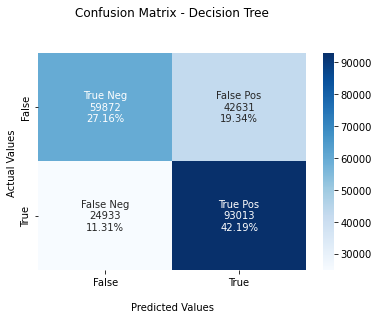

In [24]:
#Acurácia
from sklearn.metrics import confusion_matrix

#Confusion matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

ax.set_title('Treino - Decision Tree\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.

plt.show()

Notamos que a porcentagem de False Negative aumenta quando adicionamos níveis de nós de decisão (max_depth).

###Aplicando DT em valid

Lembrando que valid não foi resemplada, vamos testar os parâmetros do modelo em valid:

In [29]:
#separando
labels = valid.columns[1:]

X = valid[labels]
y = valid['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#modeling
dt = sk_tree.DecisionTreeClassifier(max_depth = 2)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)


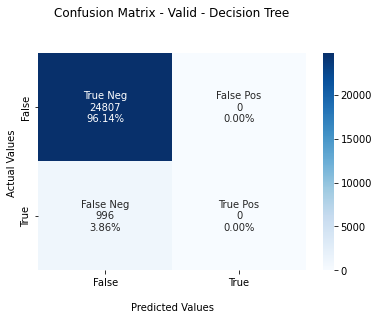

In [26]:
#Acurácia
from sklearn.metrics import confusion_matrix

#Confusion matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

ax.set_title('Valid - Decision Tree\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.

plt.show()

Vemos que a decision tree não é suficiente para nos prever casos de sinistro em uma base de dados desbalanceada.

## Logistic Regression em treino

In [27]:
#separando
labels = treino.columns[1:]

X = treino[labels]
y = treino['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#modeling
from sklearn.linear_model import LogisticRegression
logir = LogisticRegression()
logir.fit(X_train, y_train)
y_pred = logir.predict(X_test)


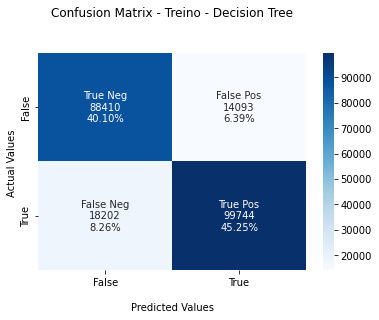

In [28]:
#Acurácia
from sklearn.metrics import confusion_matrix

#Confusion matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

ax.set_title('Treino - Logistic Regression\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.

plt.show()

Logistic Regression não performou tão bem, em termos de FN. Vamos testar em valid com propósito educacional apenas.

###Aplicando LR em valid

In [30]:
#separando
labels = valid.columns[1:]

X = valid[labels]
y = valid['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#modeling
from sklearn.linear_model import LogisticRegression
logir = LogisticRegression()
logir.fit(X_train, y_train)
y_pred = logir.predict(X_test)


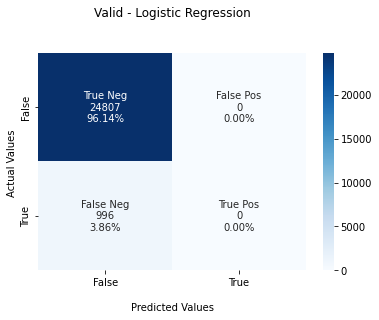

In [31]:
#Acurácia
from sklearn.metrics import confusion_matrix

#Confusion matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

ax.set_title('Valid - Logistic Regression\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.

plt.show()

Performa de maneira ruim.

##Random Forest

###Aplicando Random Forest em treino

In [58]:
#separando
labels = treino.columns[1:]

X = treino[labels]
y = treino['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#modeling
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators= 100, max_depth = 9)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

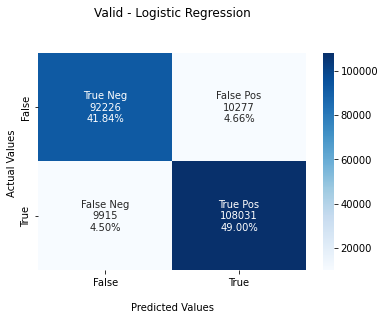

In [59]:
#Acurácia
from sklearn.metrics import confusion_matrix

#Confusion matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

ax.set_title('Treino - Random Forest\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.

plt.show()

max_depth = 9 manteve a menor taxa de erro, sendo FN < FP

###Aplicando RF em valid

In [60]:
#separando
labels = valid.columns[1:]

X = valid[labels]
y = valid['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#modeling
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators= 100, max_depth = 9)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

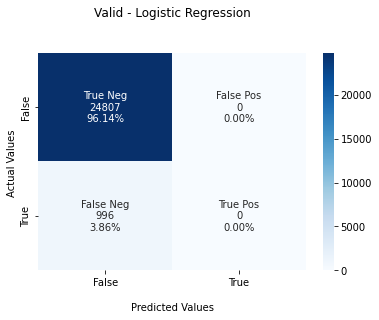

In [61]:
#Acurácia
from sklearn.metrics import confusion_matrix

#Confusion matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

ax.set_title('Valid - Random Forest\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.

plt.show()

##AdaBoosting

###Aplicanda AdaBoosting em treino

In [63]:
#separando
labels = treino.columns[1:]

X = treino[labels]
y = treino['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#modeling
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(random_state= 7)
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)

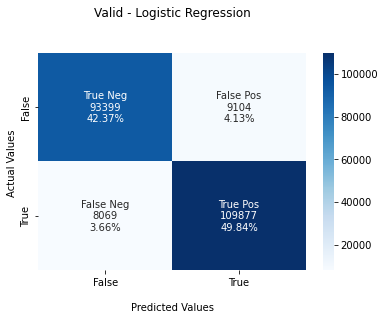

In [64]:
#Acurácia
from sklearn.metrics import confusion_matrix

#Confusion matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

ax.set_title('Treino - AdaBoosting\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.

plt.show()

###Aplicando em valid

In [65]:
#separando
labels = valid.columns[1:]

X = valid[labels]
y = valid['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#modeling
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(random_state= 7)
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)

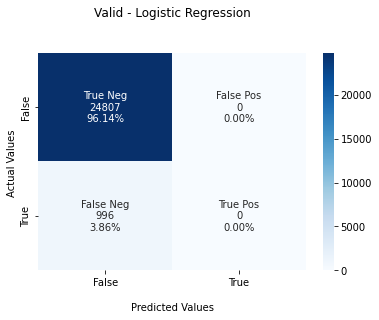

In [66]:
#Acurácia
from sklearn.metrics import confusion_matrix

#Confusion matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

ax.set_title('Valid - AdaBoosting\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.

plt.show()

Não apresenta qualquer sinal de melhora.

##GradientBoosting

###Aplicando GradientBoosting em treino

In [69]:
#separando
labels = treino.columns[1:]

X = treino[labels]
y = treino['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#modeling
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0,
                                 max_depth=3, random_state=0)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)

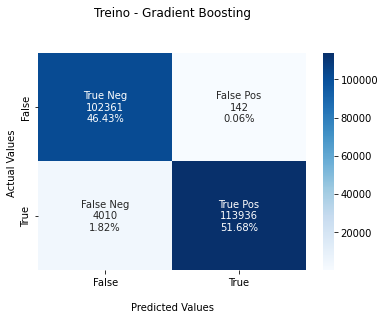

In [70]:
#Acurácia
from sklearn.metrics import confusion_matrix

#Confusion matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

ax.set_title('Treino - Gradient Boosting\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.

plt.show()

###Aplicando gb em valid

In [71]:
#separando
labels = valid.columns[1:]

X = valid[labels]
y = valid['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#modeling
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
                                 max_depth=3, random_state=0)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)

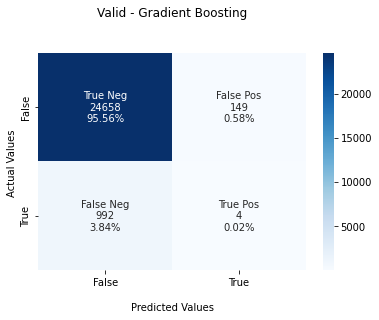

In [72]:
#Acurácia
from sklearn.metrics import confusion_matrix

#Confusion matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

ax.set_title('Valid - Gradient Boosting\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.

plt.show()

##XGBoost

###Aplicando XGBoost em treino

In [76]:
#separando
labels = treino.columns[1:]

X = treino[labels]
y = treino['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#modeling
import xgboost as xgb
xgb = xgb.XGBRegressor(objective ='reg:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

In [77]:
#Acurácia
from sklearn.metrics import confusion_matrix

#Confusion matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

ax.set_title('Valid - Gradient Boosting\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.

plt.show()

ValueError: ignored

d
ddd











d

In [ ]:
#O lançador do desafio nos informa que toda missing data da base está como -1

#Optamos por substituir -1 para NaN 
df = df.replace(-1,{})

In [ ]:
#!pip install missingno

In [ ]:
# Nullity or missing values by columns
#import missingno as msno
#msno.matrix(df=df.iloc[:,1:39], figsize=(20, 14), color=(0.42, 0.1, 0.05));

In [ ]:
#id não ajuda, vou dropar
df.drop(['id'], axis=1, inplace=True)

#ps_car_03_cat e ps_car_05_cat tem muito nan, vou dropar
df.drop(['ps_car_03_cat', 'ps_car_05_cat'], axis = 1, inplace = True)

#ps_reg_03 e ps_car_14 são continuas, vou preencher com média
df['ps_reg_03'].fillna((df['ps_reg_03'].mean()), inplace=True)
df['ps_car_14'].fillna((df['ps_car_14'].mean()), inplace=True)


#ps_car_07_cat, vou preencher com moda
df['ps_car_07_cat'] = df['ps_car_07_cat'].fillna(df['ps_car_07_cat'].mode()[0])

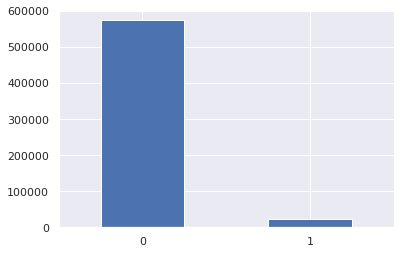

In [ ]:
#distribuição de target
df["target"].value_counts().plot(kind = 'bar')
plt.xticks(rotation = 360);

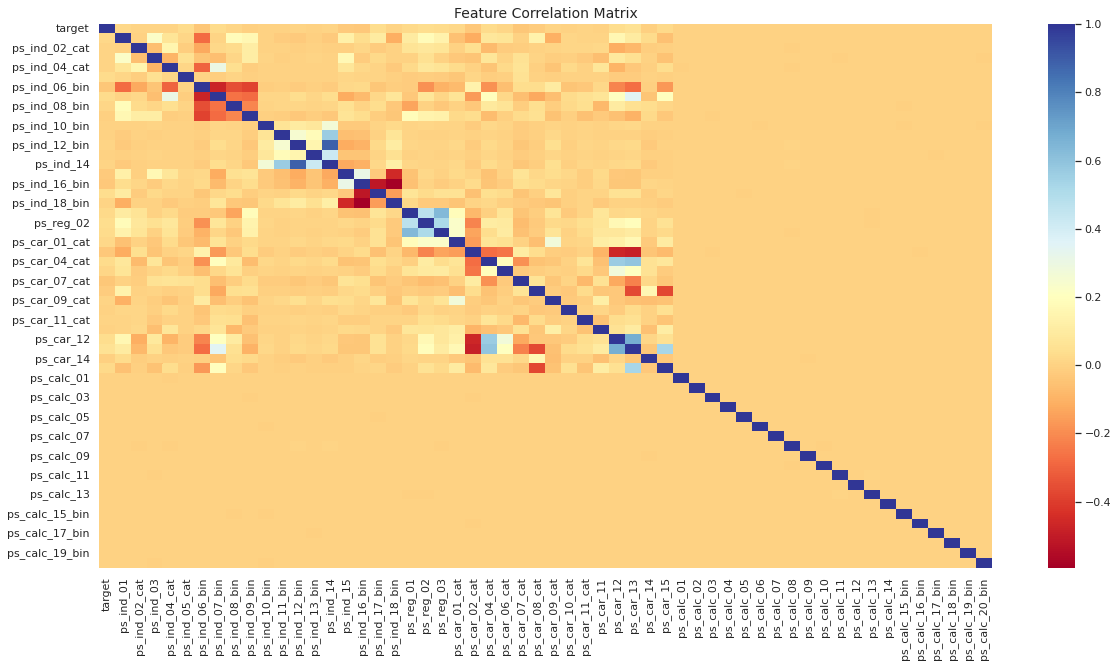

In [ ]:
#correlação das variáveis
fig, ax = plt.subplots(figsize=(20,10)) 
corrmat = df.corr()
sns.heatmap(corrmat, cmap='RdYlBu', annot_kws={'size':30}, ax=ax)
ax.set_title("Feature Correlation Matrix", fontsize=14)
plt.show()

Ruim de visualizar os impactos porque (1) há baixo impacto e as cores são parecidas e (2) há muitas variáveis. No entanto, podemos ver que _calc não aparenta ter qualquer relação com qualquer variável, sendo cadidata ao drop.

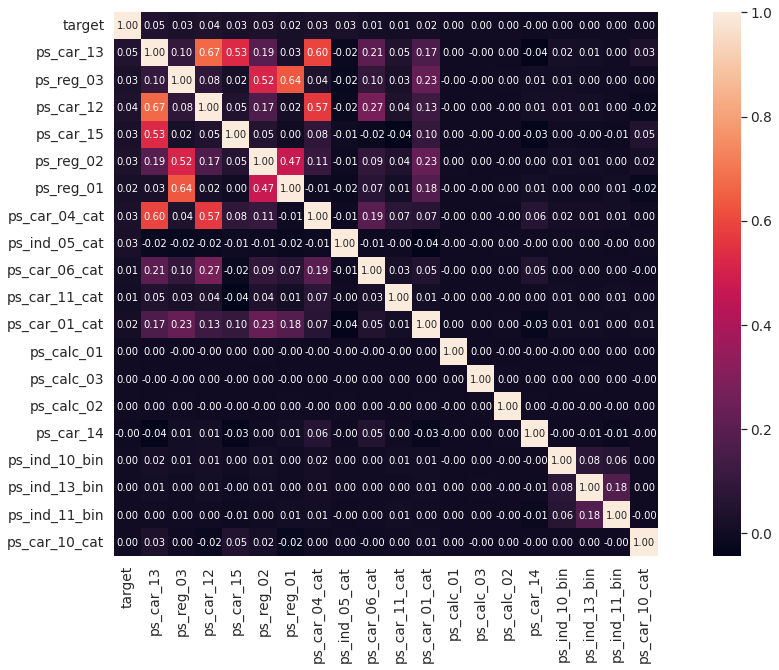

In [ ]:
#target correlation matrix
plt.rcParams['figure.figsize'] = [20, 10]

k = 20 #number of variables for heatmap
cols = corrmat.nlargest(k, 'target')['target'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

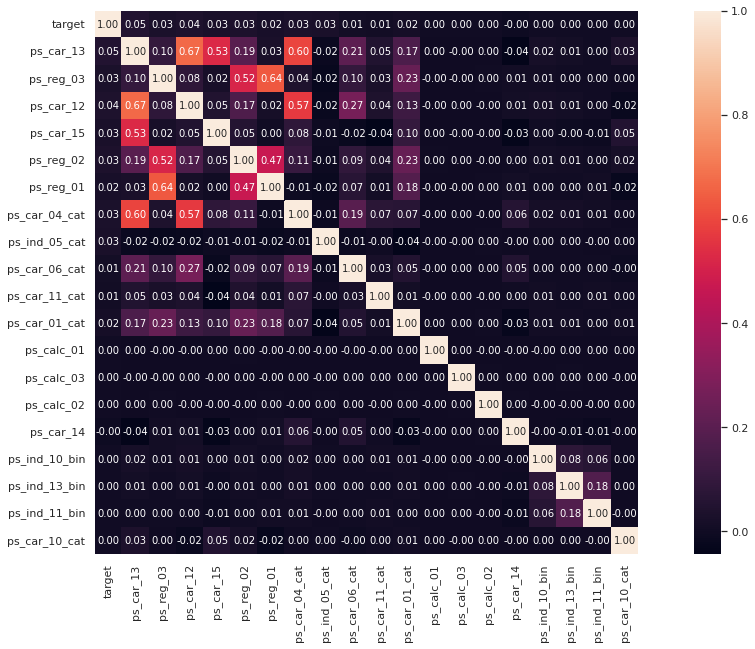

In [ ]:
#target correlation matrix
plt.rcParams['figure.figsize'] = [20, 10]

k = 20 #number of variables for heatmap
cols = corrmat.nlargest(k, 'target')['target'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

#Resampling

In [ ]:
df.head()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_04_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,0,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,0,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,0,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,0,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [ ]:
labels = df.columns[1:]

X = df[labels]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

Usando SMOTE resampler

Usar o resampling apenas no treino e aplicar o modelo no teste

In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE(random_state=7).fit_resample(X,y)
Counter(y_resampled)

Counter({0: 573518, 1: 573518})

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=1)

In [ ]:
X_train.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_04_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
526081,1,2,8,1,0,0,0,1,0,0,0,0,0,0,4,1,0,0,0.900000,0.500000,0.821584,10,0,0,14,1,1,0,1,68,3,0.447214,0.699158,0.427200,2.000000,0.300000,0.300000,0.300000,1,2,9,5,9,2,12,4,1,3,7,1,1,1,0,0,0
932410,3,4,8,1,0,0,0,0,0,0,0,0,0,0,8,1,0,0,0.512982,0.000000,0.771507,11,1,0,1,1,1,2,1,64,3,0.316228,0.631625,0.354698,3.043771,0.293509,0.193509,0.735497,2,2,8,3,7,3,10,5,2,2,4,0,0,0,0,0,0
278287,0,2,0,1,-1,0,0,0,1,0,0,0,0,0,8,1,0,0,0.900000,0.500000,0.977880,11,1,0,0,-1,1,2,1,39,3,0.316070,0.711955,-1.000000,3.162278,0.200000,0.200000,0.300000,2,3,8,3,9,3,8,4,1,6,3,0,1,1,1,0,1
774279,0,1,2,0,0,0,0,0,0,0,0,0,0,0,9,1,0,0,0.900000,0.497524,-0.276492,11,0,0,2,1,1,2,1,104,2,0.441505,0.933289,0.392446,3.311944,0.397524,0.651238,0.597524,3,2,6,3,9,3,9,9,1,0,3,0,0,0,0,0,0
177316,3,1,7,1,0,0,1,0,0,0,0,0,0,0,9,0,0,1,0.000000,0.000000,1.043731,6,1,0,6,1,1,0,1,27,2,0.374166,0.752613,0.390768,3.464102,0.500000,0.700000,0.100000,4,1,8,4,10,3,11,4,1,3,13,0,1,0,0,1,0


In [ ]:
X_resampled.reset_index(drop=True, inplace=True)
y_resampled.reset_index(drop=True, inplace=True)


In [ ]:
df_resampled = pd.concat((X_resampled,y_resampled), axis = 1)
df_resampled.shape

(1147036, 56)

In [ ]:
df_resampled.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_04_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,target
0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,0,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1,0
1,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,0,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0,0
2,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,0,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0,0
3,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0,0
4,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,0,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0,0


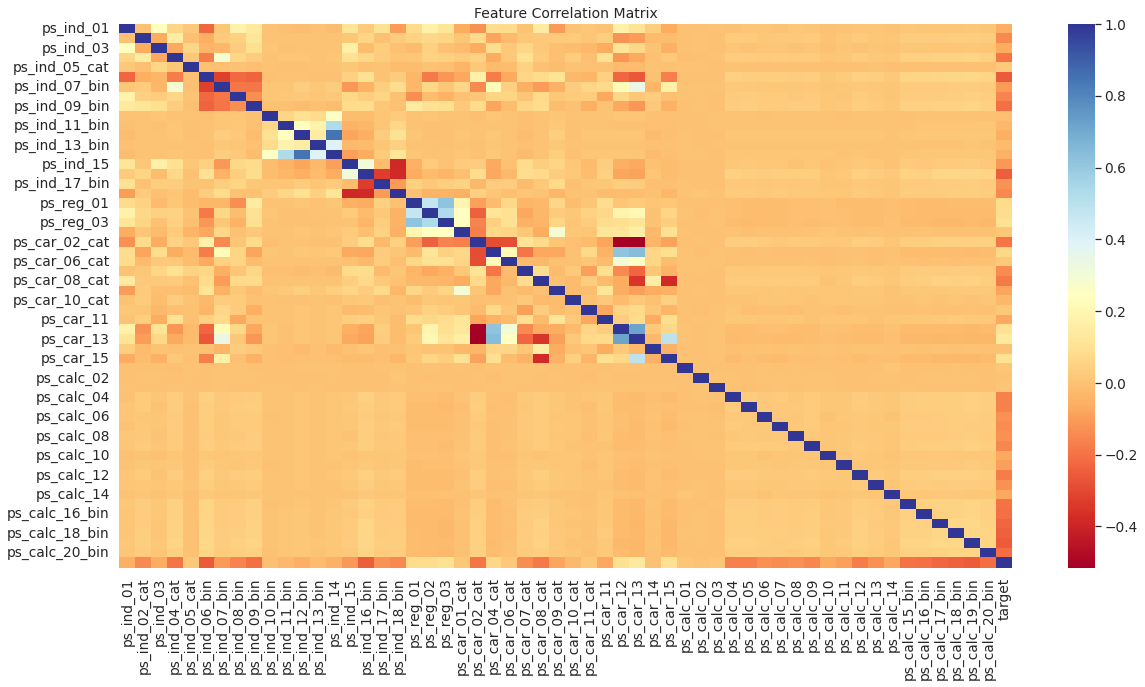

In [ ]:
#correlação das variáveis 
fig, ax = plt.subplots(figsize=(20,10)) 
corrmat = df_resampled.corr()
sns.heatmap(corrmat, cmap='RdYlBu', annot_kws={'size':30}, ax=ax)
ax.set_title("Feature Correlation Matrix", fontsize=14)
plt.show()

Agora que a base está balanceada, _cal afeta target

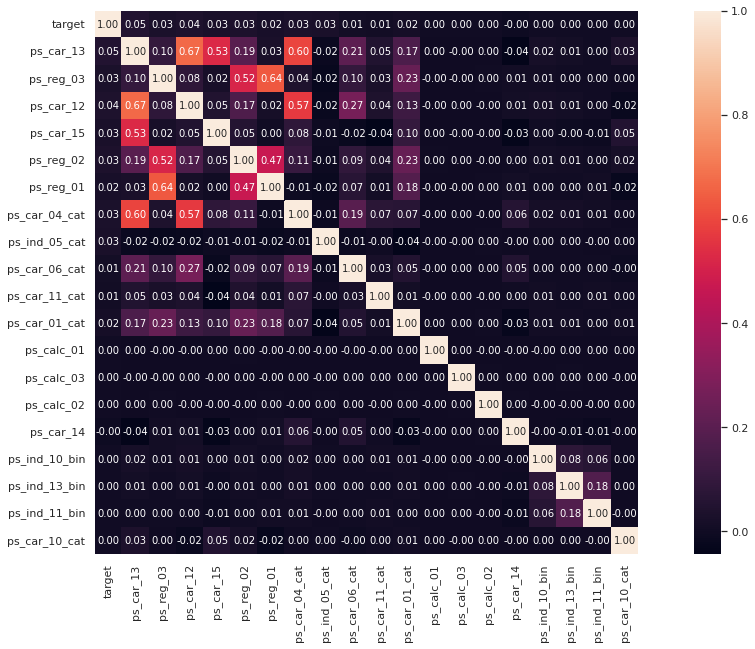

In [ ]:
#target correlation matrix
plt.rcParams['figure.figsize'] = [20, 10]

k = 20 #number of variables for heatmap
cols = corrmat.nlargest(k, 'target')['target'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

feature engineering

In [ ]:
## filling NAN das categoricas com mode

df_resampled['ps_car_01_cat'].fillna((df['ps_car_01_cat'].mode()), inplace=True)
df_resampled['ps_car_02_cat'].fillna((df['ps_car_02_cat'].mode()), inplace=True)
df_resampled['ps_car_04_cat'].fillna((df['ps_car_04_cat'].mode()), inplace=True)
df_resampled['ps_car_06_cat'].fillna((df['ps_car_06_cat'].mode()), inplace=True)
df_resampled['ps_car_08_cat'].fillna((df['ps_car_08_cat'].mode()), inplace=True)
df_resampled['ps_car_09_cat'].fillna((df['ps_car_09_cat'].mode()), inplace=True)
df_resampled['ps_car_10_cat'].fillna((df['ps_car_10_cat'].mode()), inplace=True)
df_resampled['ps_car_11_cat'].fillna((df['ps_car_11_cat'].mode()), inplace=True)
df_resampled['ps_ind_02_cat'].fillna((df['ps_ind_02_cat'].mode()), inplace=True)
df_resampled['ps_ind_04_cat'].fillna((df['ps_ind_04_cat'].mode()), inplace=True)
df_resampled['ps_ind_05_cat'].fillna((df['ps_ind_05_cat'].mode()), inplace=True)

In [ ]:
## filling NAN das binarias com mode

df_resampled['ps_calc_15_bin'].fillna((df['ps_calc_15_bin'].mode()), inplace=True)
df_resampled['ps_calc_16_bin'].fillna((df['ps_calc_16_bin'].mode()), inplace=True)
df_resampled['ps_calc_17_bin'].fillna((df['ps_calc_17_bin'].mode()), inplace=True)
df_resampled['ps_calc_18_bin'].fillna((df['ps_calc_18_bin'].mode()), inplace=True)
df_resampled['ps_calc_19_bin'].fillna((df['ps_calc_19_bin'].mode()), inplace=True)
df_resampled['ps_calc_20_bin'].fillna((df['ps_calc_20_bin'].mode()), inplace=True)
df_resampled['ps_ind_16_bin'].fillna((df['ps_ind_16_bin'].mode()), inplace=True)
df_resampled['ps_ind_17_bin'].fillna((df['ps_ind_17_bin'].mode()), inplace=True)
df_resampled['ps_ind_18_bin'].fillna((df['ps_ind_18_bin'].mode()), inplace=True)

In [ ]:
df_resampled['ps_calc_01'].fillna((df['ps_calc_01'].median()), inplace=True)
df_resampled['ps_calc_02'].fillna((df['ps_calc_02'].median()), inplace=True)
df_resampled['ps_calc_03'].fillna((df['ps_calc_03'].median()), inplace=True)
df_resampled['ps_calc_04'].fillna((df['ps_calc_04'].median()), inplace=True)
df_resampled['ps_calc_05'].fillna((df['ps_calc_05'].median()), inplace=True)
df_resampled['ps_calc_06'].fillna((df['ps_calc_06'].median()), inplace=True)
df_resampled['ps_calc_07'].fillna((df['ps_calc_07'].median()), inplace=True)
df_resampled['ps_calc_08'].fillna((df['ps_calc_08'].median()), inplace=True)
df_resampled['ps_calc_09'].fillna((df['ps_calc_09'].median()), inplace=True)
df_resampled['ps_calc_10'].fillna((df['ps_calc_10'].median()), inplace=True)
df_resampled['ps_calc_11'].fillna((df['ps_calc_11'].median()), inplace=True)
df_resampled['ps_calc_12'].fillna((df['ps_calc_12'].median()), inplace=True)
df_resampled['ps_calc_13'].fillna((df['ps_calc_13'].median()), inplace=True)
df_resampled['ps_calc_14'].fillna((df['ps_calc_14'].median()), inplace=True)

df_resampled['ps_ind_07_bin'].fillna((df['ps_ind_07_bin'].median()), inplace=True)
df_resampled['ps_ind_08_bin'].fillna((df['ps_ind_08_bin'].median()), inplace=True)
df_resampled['ps_ind_09_bin'].fillna((df['ps_ind_09_bin'].median()), inplace=True)
df_resampled['ps_ind_10_bin'].fillna((df['ps_ind_10_bin'].median()), inplace=True)
df_resampled['ps_ind_11_bin'].fillna((df['ps_ind_11_bin'].median()), inplace=True)
df_resampled['ps_ind_12_bin'].fillna((df['ps_ind_12_bin'].median()), inplace=True)
df_resampled['ps_ind_13_bin'].fillna((df['ps_ind_13_bin'].median()), inplace=True)
df_resampled['ps_ind_14'].fillna((df['ps_ind_14'].median()), inplace=True)
df_resampled['ps_ind_15'].fillna((df['ps_ind_15'].median()), inplace=True)
df_resampled['ps_reg_01'].fillna((df['ps_reg_01'].median()), inplace=True)
df_resampled['ps_reg_02'].fillna((df['ps_reg_02'].median()), inplace=True)

In [ ]:
## filling NAN das contínuas com mean
df_resampled['ps_reg_03'].fillna((df['ps_reg_03'].mean()), inplace=True)
df_resampled['ps_car_12'].fillna((df['ps_car_12'].mean()), inplace=True)
df_resampled['ps_car_13'].fillna((df['ps_car_13'].mean()), inplace=True)
df_resampled['ps_car_14'].fillna((df['ps_car_14'].mean()), inplace=True)
df_resampled['ps_car_15'].fillna((df['ps_car_15'].mean()), inplace=True)



In [ ]:
#normalization as "outras"
#z-score

#from scipy.stats import zscore
#df_resampled[''] = zscore(df_resampled[''])



In [ ]:
# Removendo outliers
#Dropping the outlier rows with standard deviation
n=3

for label, content in df_resampled.items():
   upper_limit = df_resampled[label].mean() + n*df_resampled[label].std () 
   lower_limit = df_resampled[label].mean() - n*df_resampled[label].std ()

dft = df_resampled[(df_resampled[label] < upper_limit) & 
                   (df_resampled[label] > lower_limit)]

modelando

In [ ]:
dft=dft.loc[:,::-1]
dft.head()

,target,ps_calc_20_bin,ps_calc_19_bin,ps_calc_18_bin,ps_calc_17_bin,ps_calc_16_bin,ps_calc_15_bin,ps_calc_14,ps_calc_13,ps_calc_12,ps_calc_11,ps_calc_10,ps_calc_09,ps_calc_08,ps_calc_07,ps_calc_06,ps_calc_05,ps_calc_04,ps_calc_03,ps_calc_02,ps_calc_01,ps_car_15,ps_car_14,ps_car_13,ps_car_12,ps_car_11,ps_car_11_cat,ps_car_10_cat,ps_car_09_cat,ps_car_08_cat,ps_car_07_cat,ps_car_06_cat,ps_car_04_cat,ps_car_02_cat,ps_car_01_cat,ps_reg_03,ps_reg_02,ps_reg_01,ps_ind_18_bin,ps_ind_17_bin,ps_ind_16_bin,ps_ind_15,ps_ind_14,ps_ind_13_bin,ps_ind_12_bin,ps_ind_11_bin,ps_ind_10_bin,ps_ind_09_bin,ps_ind_08_bin,ps_ind_07_bin,ps_ind_06_bin,ps_ind_05_cat,ps_ind_04_cat,ps_ind_03,ps_ind_02_cat,ps_ind_01
0,0,1,0,0,1,1,0,8,5,1,9,5,1,10,1,10,1,3,0.2,0.5,0.6,3.605551,0.370810,0.883679,0.400000,2,12,1,0,0,1,4,0,1,10,0.718070,0.2,0.7,0,1,0,11,0,0,0,0,0,0,0,1,0,0,1,5,2,2
1,0,0,1,0,1,1,0,9,1,1,3,7,1,8,5,9,1,2,0.3,0.1,0.3,2.449490,0.388716,0.618817,0.316228,3,19,1,2,1,1,11,0,1,11,0.766078,0.4,0.8,1,0,0,3,0,0,0,0,0,0,1,0,0,0,0,7,1,1
2,0,0,1,0,1,1,0,7,7,2,4,7,2,8,1,9,2,2,0.1,0.7,0.5,3.316625,0.347275,0.641586,0.316228,1,60,1,2,1,1,14,0,1,7,-1.000000,0.0,0.0,0,0,1,12,0,0,0,0,0,0,1,0,0,0,1,9,4,5
3,0,0,0,0,0,0,0,9,4,2,2,2,4,8,1,7,4,2,0.1,0.9,0.6,2.000000,0.294958,0.542949,0.374166,1,104,1,3,1,1,11,0,1,7,0.580948,0.2,0.9,0,0,1,8,0,0,0,0,0,0,0,0,1,0,0,2,1,0
4,0,0,1,1,0,0,0,3,1,1,3,12,2,10,3,6,2,2,0.0,0.6,0.4,2.000000,0.365103,0.565832,0.316070,3,82,1,2,1,1,14,0,1,11,0.840759,0.6,0.7,0,0,1,9,0,0,0,0,0,0,0,0,1,0,1,0,2,0


In [ ]:
#separando
labels = dft.columns[1:]

X = dft[labels]
y = dft['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
#Acurácia
from sklearn.metrics import accuracy_score, confusion_matrix

dt = sk_tree.DecisionTreeClassifier(max_depth = 3)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 72.48%


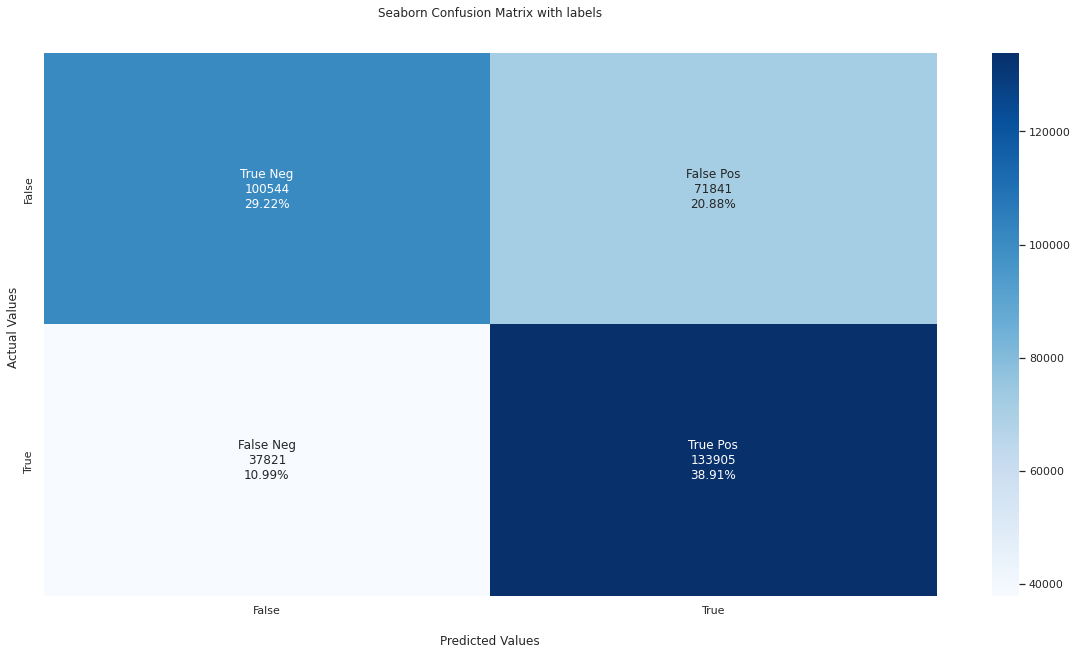

In [ ]:

#Confusion matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.

plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
logir = LogisticRegression()
logir.fit(X_train, y_train)
y_pred = logir.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 85.87%


random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators= 100, max_depth = 10)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 90.67%


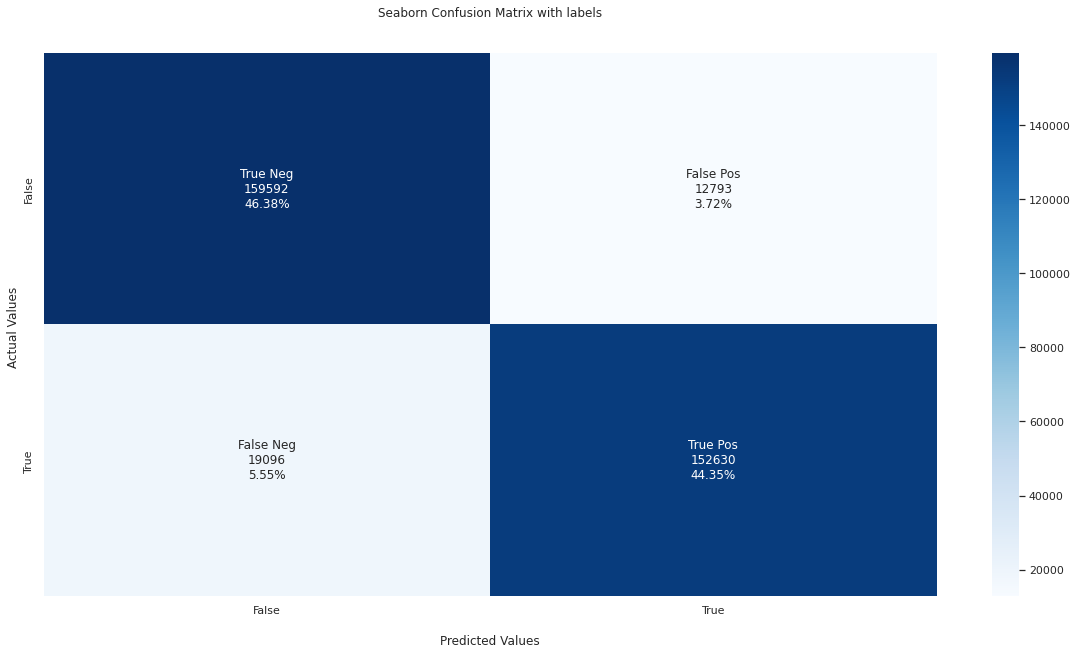

In [ ]:
#Confusion matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.

plt.show()

Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(random_state= 7)

ada.fit(X_train, y_train)

y_pred = ada.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 91.40%


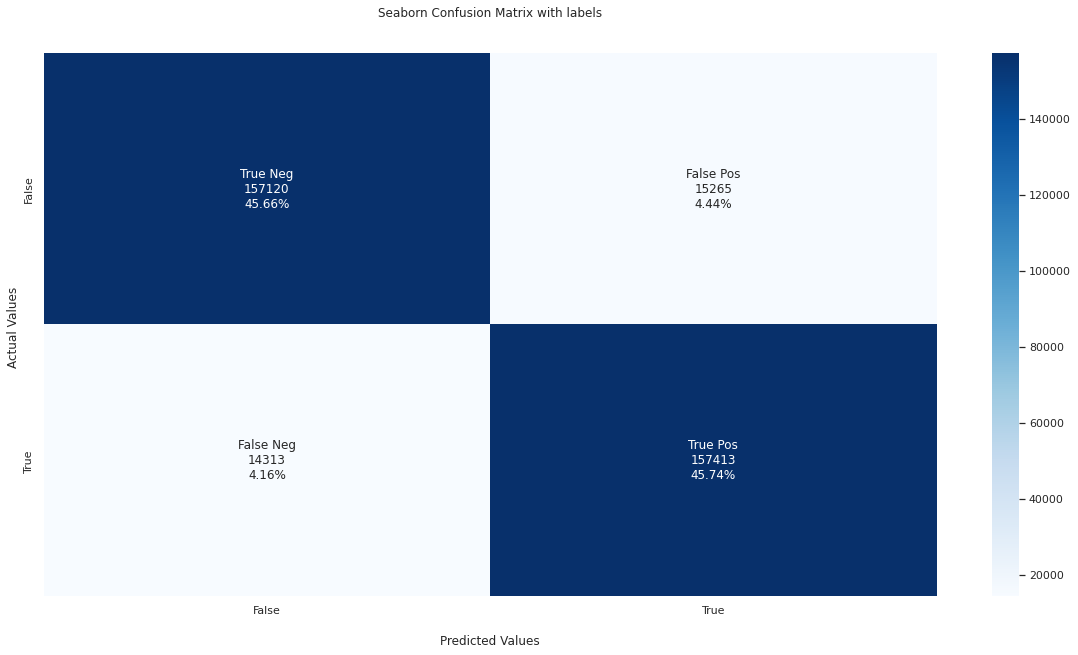

In [ ]:
#Confusion matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.

plt.show()

blending

In [ ]:
from mlxtend.regressor import StackingCVRegressor

stack_gen = StackingCVRegressor(regressors=(dt, logir, rf, ada),
                                meta_regressor = logir,
                                use_features_in_secondary=True)

In [ ]:


dt_model_full_data = dt.fit(X, y)

logir_model_full_data = logir.fit(X, y)

rf_model_full_data = rf.fit(X, y)

ada_model_full_data = ada.fit(X, y)

In [ ]:
stack_gen_model = stack_gen.fit(X, y)

dt_model_full_data = dt.fit(X, y)

logir_model_full_data = logir.fit(X, y)

rf_model_full_data = rf.fit(X, y)

ada_model_full_data = ada.fit(X, y)

KeyError: ignored

In [ ]:
from sklearn import datasets, linear_model
# ver notebook de house_pipe

x_model = ["dt_model_full_data","logir_model_full_data","rf_model_full_data","ada_model_full_data"]
lreg = linear_model.LinearRegression()
lreg.fit(x_model,y_train)

y_pred = lreg.predict(X_test)


# Coeficientes
print("Coeficientes: \n", lreg.coef_)

ValueError: ignored

In [ ]:
def blend_models_predict(X):
    return ((0.1 * dt_model_full_data.predict(X)) +\
            (0.20 * logir_model_full_data.predict(X)) + \
            (0.15 * rf_model_full_data.predict(X)) + \
            (0.25 * ada_model_full_data.predict(X)) + \
            (0.4 * stack_gen_model.predict(np.array(X))))
